In [ ]:
import Pkg
Pkg.add("IterativeSolvers")
Pkg.add("Arpack")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed IterativeSolvers ─ v0.9.4
    Updating `~/.julia/environments/v1.10/Project.toml`
  [42fd0dbc] + IterativeSolvers v0.9.4
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [42fd0dbc] + IterativeSolvers v0.9.4
Precompiling packages...
   2765.1 ms  ✓ IterativeSolvers
  1 dependency successfully precompiled in 12 seconds. 462 already precompiled.
   Resolving package versions...
   Installed Arpack_jll ─ v3.5.1+1
   Installed Arpack ───── v0.5.4
    Updating `~/.julia/environments/v1.10/Project.toml`
  [7d9fca2a] + Arpack v0.5.4
    Updating `~/.julia/environments/v1.10/Manifest.toml`
  [7d9fca2a] + Arpack v0.5.4
⌅ [68821587] + Arpack_jll v3.5.1+1
        Info Packages marked with ⌅ have new versions available but compatibility constraints restrict them from upgrading. To see why use `status --outdated -m`
Precompiling packages...
    857.2 ms  ✓ Arpack_jll
    746.9 ms  ✓ Ar

In [ ]:
using LinearAlgebra
using Random
using IterativeSolvers
using SparseArrays
using Arpack
using Plots

Criar sistema linear positivo definido e esparso.

In [ ]:
T(n) = sparse(Tridiagonal(ones(n-1), 4*ones(n), ones(n-1)))

function matrizproblema(n,m)
  D = blockdiag([ T(n) for i=1:m]...)
  menosuns = spdiagm( -n => -ones(n*(m-1)), n => -ones(n*(m-1)))
  D + menosuns
end

matrizproblema (generic function with 1 method)

In [ ]:
A = matrizproblema(100,10)

1000×1000 SparseMatrixCSC{Float64, Int64} with 4780 stored entries:
⎡⠻⣦⡀⠀⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⠈⠻⣦⡀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠙⢦⡀⠈⠻⣦⡀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠙⢦⡀⠈⠻⣦⡀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠙⢦⡀⠈⠻⣦⡀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠙⢦⡀⠈⠻⣦⡀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠈⠻⣦⡀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠈⠻⣦⡀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠈⠻⣦⡀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠈⠻⣦⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠻⣦⡀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠈⠻⣦⡀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠈⠻⣦⡀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠈⠻⣦⡀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠈⠻⣦⡀⠈⠳⣄⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠈⠻⣦⡀⠈⠳⣄⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠈⠻⣦⡀⠈⠳⣄⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠈⠻⣦⡀⠈⠳⣄⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠈⠻⣦⡀⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⠀⠈⠻⣦⎦

In [ ]:
lmax, p = eigs(A, nev=1, which=:LM, ritzvec=false);

In [ ]:
lmin, q = eigs(A, nev=1, which=:SM, ritzvec=false);

In [ ]:
lmax/lmin

1×1 Matrix{Float64}:
 96.5830053456587

In [ ]:
b = sum(A, dims=2)
C = Diagonal(2*ones(100*10));

In [ ]:
function meuGradienteConjugadoPre(A,b,x0,C=I,nmax=1000,tol=1e-10)
  x = x0
  r = A*x-b
  d = -y
  resvec = zeros(nmax)
  for k=0:nmax
    res = norm(r)
    resvec[k+1] = res
    if res < tol
      return x, k, res, resvec
    end
    Ad = A*d
    rTy = r'y
    alpha = rTy/d'Ad
    x = x + alpha*d
    r = r + alpha*Ad
    z = C\r
    y = (C')\z
    beta = r'y/rTy
    d = -y + beta*d;
  end
  return x, nmax, res, resvec
end



meuGradienteConjugadoPre (generic function with 4 methods)

In [ ]:
x0 = zeros(1000);
C = sparse(I,1000, 1000);

In [ ]:
size(A)

(1000, 1000)

In [ ]:
@time x, hist = cg(A,b, log=true)

  0.000999 seconds (185 allocations: 43.188 KiB)


([1.0000000002564047, 0.9999999999603454, 0.9999999972203675, 0.9999999985008148, 0.9999999976526811, 1.0000000033587733, 1.0000000051575066, 1.0000000111359595, 1.0000000047152804, 0.9999999981458434  …  0.9999999981458437, 1.0000000047152804, 1.0000000111359597, 1.000000005157507, 1.0000000033587741, 0.9999999976526811, 0.9999999985008147, 0.9999999972203677, 0.9999999999603454, 1.000000000256405], Converged after 56 iterations.)

In [ ]:
x,k,res, resvec = meuGradienteConjugadoPre(A,vec(b),x0,C)

(  [1  ]  =  1.0
  [2  ]  =  1.0
  [3  ]  =  1.0
  [4  ]  =  1.0
  [5  ]  =  1.0
  [6  ]  =  1.0
  [7  ]  =  1.0
  [8  ]  =  1.0
  [9  ]  =  1.0
  [10 ]  =  1.0
         ⋮
  [90 ]  =  1.0
  [91 ]  =  1.0
  [92 ]  =  1.0
  [93 ]  =  1.0
  [94 ]  =  1.0
  [95 ]  =  1.0
  [96 ]  =  1.0
  [97 ]  =  1.0
  [98 ]  =  1.0
  [99 ]  =  1.0
  [100]  =  1.0, 164, 4.257003006971429e-11, [90.9040741986149, 11.157043791426588, 4.3509649716014325, 2.0747302317122065, 1.1330395949780225, 0.762198319470837, 0.5625876672027732, 0.4566993024433997, 0.36943498845488826, 0.3207102046864197  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

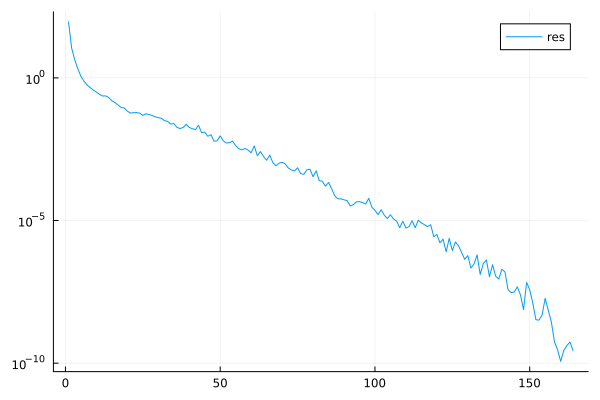

In [ ]:
plot(1:k,resvec[1:k], label="res", yscale=:log10)

## Matriz de Hilber

In [ ]:
n = 10
A = [1/(1+i+j) for i=1:n, j=1:n]
b = A[:,end]
x0 = zeros(n)
d = Diagonal(A)
C = Diagonal(d)

@time xm, k, res = meuGradienteConjugadoPre(A,b,x0, C)

  0.040016 seconds (8.13 k allocations: 614.414 KiB, 99.70% compilation time)


([-1.1383426845788987e-5, 0.0002887225343449849, -0.002552378041584978, 0.010501976151945466, -0.020717173706453214, 0.012263332489848773, 0.02419828161083865, -0.05096054528588095, 0.036526844100314926, 0.9904620898691247], 18, 6.676099160028264e-13)

In [ ]:
xp,hist = cg(A,b,Pl=C, log=true)

([-0.0012692906525037253, 0.01501236064003068, -0.05122907975191501, 0.04088865282317738, 0.05779343606218671, -0.027168496842018473, -0.10753932065608406, -0.05052235348723887, 0.2523443352828093, 0.8716187050950344], Converged after 8 iterations.)

## Exemplo que o pré-cond funciona

16/06

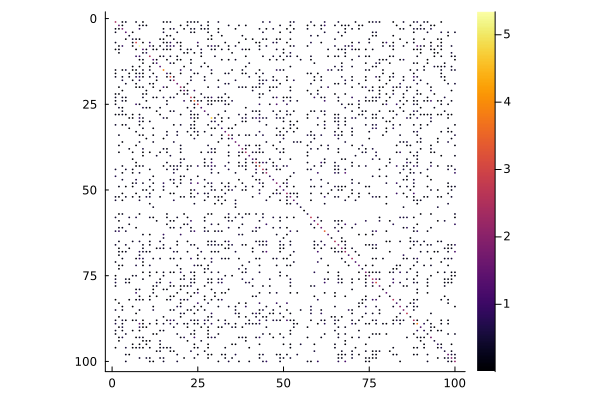

In [ ]:
n = 100
B = sprand(n,n,0.05)
A = B'B + 0.01*sparse(I,n,n)
xs = ones(n)
b = A*xs
x0 = zeros(n)
C = convert(SparseMatrixCSC{Float64},sparse(I,n,n));
spy(A)

In [ ]:
@time xm, k, res = meuGradienteConjugadoPre(A,b,x0, C)

  0.227433 seconds (43.45 k allocations: 10.267 MiB, 96.73% compilation time)


(  [1  ]  =  1.0
  [2  ]  =  1.0
  [3  ]  =  1.0
  [4  ]  =  1.0
  [5  ]  =  1.0
  [6  ]  =  1.0
  [7  ]  =  1.0
  [8  ]  =  1.0
  [9  ]  =  1.0
  [10 ]  =  1.0
         ⋮
  [90 ]  =  1.0
  [91 ]  =  1.0
  [92 ]  =  1.0
  [93 ]  =  1.0
  [94 ]  =  1.0
  [95 ]  =  1.0
  [96 ]  =  1.0
  [97 ]  =  1.0
  [98 ]  =  1.0
  [99 ]  =  1.0
  [100]  =  1.0, 164, 4.257003006971429e-11)

### Pré-Condicionador Cholesky Incompleto

In [ ]:
@views function CholeskyIncompleta(A)
  m, n = size(A)
  G = spzeros(n,n)
  for i=1:n
    parcelas = [G[k,i]^2 for k=1:i-1]
    G[i,i] = sqrt(A[i,i] - sum(parcelas))
    for j=i+1:n
      if A[i,j] != 0 # Só atualiza se A[i,j] é não zero
        parcelas = [ G[k,i]*G[k,j] for k=1:i-1 ]
        G[i,j] = (A[i,j] - sum(parcelas))/G[i,i]
      end
    end
  end
  # a G calculada assim é a transposta da matriz que queremos
  return G'
end;

In [ ]:
G = CholeskyIncompleta(A)
norm(G*G'-A)

5.971897627017329

In [ ]:
@time xm, k, res, nresvec = meuGradienteConjugadoPre(A,b,x0, G)

  0.298423 seconds (30.53 k allocations: 2.631 MiB, 99.52% compilation time)


([0.9999999999981711, 1.0000000000016407, 1.0000000000000346, 1.000000000004204, 1.0000000000074842, 0.999999999992161, 1.0000000000075007, 1.0000000000007208, 0.9999999999986023, 0.9999999999848478  …  0.9999999999964237, 1.000000000019755, 1.000000000000844, 1.000000000000611, 0.9999999999904126, 0.9999999999969511, 0.999999999994827, 1.0000000000010396, 1.0000000000079878, 1.0000000000007934], 79, 4.35464667453465e-11, [90.9040741986149, 16.91639843583797, 9.01851454027055, 3.8507634345156574, 3.0108224457483237, 1.9919037779045912, 1.4734272660027454, 1.2743587715023086, 1.0143123487135997, 0.7627619608045044  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

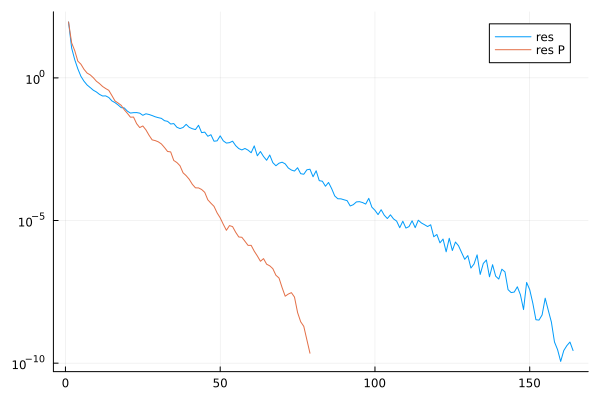

In [ ]:
plot!(1:k,nresvec[1:k], label="res P", yscale=:log10)

## Método da potência

Para uma matriz com espectro $\sigma(A) = \{3+ki: k = -1,0,1\}$

In [ ]:
A = [3 1 1; 0 3 0; -1 0 3]

3×3 Matrix{Int64}:
  3  1  1
  0  3  0
 -1  0  3

In [ ]:
x0 = rand(3)
x0 = x0/norm(x0)

3-element Vector{Float64}:
 0.872489342933029
 0.42782656145134795
 0.23606520240180923

In [ ]:
for j = 1:100
  x0 = A*x0
  x0 = x0/norm(x0)
end

In [ ]:
x0

3-element Vector{Float64}:
 0.1316685292306121
 3.154324045131282e-8
 0.9912938002480629

In [ ]:
x0'A*x0

3.000000004153252

In [ ]:
x0*(1/x0[1])

3-element Vector{Float64}:
 1.0
 2.395655259129242e-7
 7.528707171262254

In [ ]:
A*x0

3-element Vector{Float64}:
 -0.9505995227208304
  1.8361333890487418e-5
  3.0160154029459765

In [ ]:
x = [1,0,7.52]
A*x/(3+I)

3-element Vector{Float64}:
 2.63
 0.0
 5.39

In [ ]:
eigen(A)

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
3-element Vector{ComplexF64}:
 3.0 - 1.0im
 3.0 + 0.0im
 3.0 + 1.0im
vectors:
3×3 Matrix{ComplexF64}:
 0.707107-0.0im             0.0+0.0im  0.707107+0.0im
      0.0-0.0im        0.707107+0.0im       0.0+0.0im
      0.0-0.707107im  -0.707107+0.0im       0.0+0.707107im